## Tensorflow Fashion MNIST
---

Fashion-MNIST es un dataset de imágenes de artículos de Zalando consistente en un training set de 60.000 ejemplos y un test set de 10.000 ejemplos. 
<br><br>
Cada ejemplo es una imagen en escala de grises de 28x28 píxels, asociada a una etiqueta numérica de las 10 clases existentes:
<br><br>
0: T-shirt/top <br>
1: Trouser<br>
2: Pullover<br>
3: Dress<br>
4: Coat<br>
5: Sandal<br>
6: Shirt<br>
7: Sneaker<br>
8: Bag<br>
9: Ankle boot<br>

---
### Importando los datos

En primer lugar, importamos la librería Tensorflow

In [76]:
import tensorflow as tf
print(tf.__version__)

1.14.0


El dataset Fashion MNIST está disponible directamente en el API tf.keras

In [77]:
fmnist = tf.keras.datasets.fashion_mnist

<br>
La invocación del método load_data() generará dos datasets, uno para el entrenamiento de la red neuronal y otro para las pruebas, así como las listas con las etiquetas (labels) correspondientes

In [78]:
(train_data, train_labels), (test_data, test_labels) = fmnist.load_data()

<br>
Muestra de 100 ejemplos escogidos al azar del dataset de entreno (train_data)

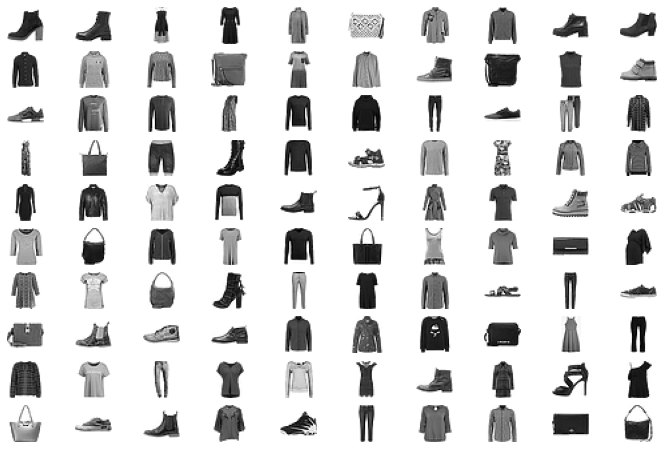

In [79]:
import numpy as np
import matplotlib.pyplot as plt

fig, axis = plt.subplots(10, 10, figsize=(12, 8))

for i in range(10):
    for j in range(10):
        axis[i,j].imshow(
            train_data[np.random.randint(0, train_data.shape[0]+1),:].reshape(28, 28, order="F"),
            cmap = "gray_r")
        axis[i,j].axis("off")

<br>
Detalle del primer registro del dataset de entreno (train_data) y su etiqueta (train_labels)

label: 9
pixel data:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 

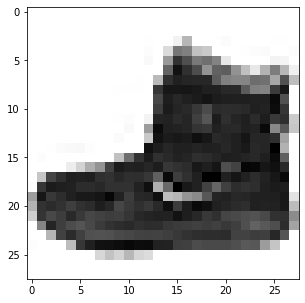

In [80]:
np.set_printoptions(linewidth=200)

plt.figure(figsize=(5, 5))
plt.imshow(train_data[0], cmap="gray_r")

print("label:", train_labels[0])
print("pixel data:\n", train_data[0])

---
### Normalizando los datos

Observamos que los valores correspondientes a los píxeles de cada imagen se encuentran en el rango [0, 255] (0: blanco | 255: negro). Cuando trabajamos con redes neuronales, es aconsejable que los valores estén en el rango [0, 1]. Este proceso se denomina **normalización**

In [81]:
train_data = train_data/255.0
test_data = test_data/255.0

---
### Diseñando el modelo

Definimos ahora nuestra red neuronal que constará de tres capas:
<br>
- **Input layer:** se corresponde con cada uno de los 28x28 píxeles de la imagen. El método **Flatten()** convertirá cada una de las imágenes en un array 1-dimensional
<br><br>
- **Hidden layer:** estará formada por 128 unidades (neuronas). Deberemos indicar la función de activación para cada una de ellas. La función de rectificación **ReLU**. También conocida como función 
**rampa** se expresa como **_f(x)=max(x,0)_**, es una función de activación común en redes neuronales profundas
<br><br>
- **Output layer:** tendrá tantas unidades como clases diferentes de imágenes (en este caso, 10). Cada una de estas unidades devolverá la probalidad de que la imagen de entrada se corresponda con una de las clases. La función de activación **softmax** devolverá un array de tantos elementos como unidades de salida cuyos valores serán todos 0 salvo el correspondiente a la clase de mayor probabilidad, que será 1

In [82]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

---
### Compilando el modelo

Una vez definida nuestra red neuronal, deberemos compilarla. Para ello, indicaremos la función de pérdida (o coste) que se empleará para "medir" la desviación de las predicciones frente al valor real, así como el método de optimización que se empleará

In [83]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

---
### Entrenando la red neuronal

Usaremos ahora el training set para entrenar nuestra red neural de forma que aprenda a clasificar las diferentes imágenes

In [84]:
model.fit(train_data, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4874 - acc: 0.8274
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3654 - acc: 0.8673
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3274 - acc: 0.8793
Epoch 4/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3022 - acc: 0.8879
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2871 - acc: 0.8954
Epoch 6/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2705 - acc: 0.8993
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2557 - acc: 0.9046
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2460 - acc: 0.9087
Epoch 9/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2348 - acc: 0.9124
Epoch 10/10
60000/60000 [==============================] - 5s 88us/sample - loss: 

Vemos que la precisión obtenida en la clasificación de imágenes ronda el 91%. No está nada mal para tan poco entrenamiento!


---
### Evaluando el modelo

Veamos que tal se le da ahora predecir sobre el test set. Recuerda que no utilizó ninguna de estas imágenes para el entrenamiento y son todas nuevas para él

In [85]:
model.evaluate(test_data, test_labels)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.3520 - acc: 0.8849


[0.3520255240082741, 0.8849]

La precisión obtenida es de un 88%, sensiblemente inferior a la obtenida sobre el set de entrenamiento. Esto nos podría indicar cierto grade de **_overfitting_** que podríamos solucionar con más datos de entreno o con regularización

---
### Haciendo predicciones

Con el modelo entrenado, podemos hacer predicciones sobre imágenes

In [86]:
predictions = model.predict(test_data)
predictions[0]

array([1.6502744e-08, 3.6651631e-09, 4.3708720e-10, 2.1993841e-11, 1.1739079e-09, 1.7712801e-04, 2.1939184e-09, 8.5642689e-04, 1.7139140e-08, 9.9896646e-01], dtype=float32)

La predicción para cada imagen será un array con las probabilidades de que sea una de las clases de salida
<br><br>
Veamos las predicciones de las 10 primeras entradas del test set:

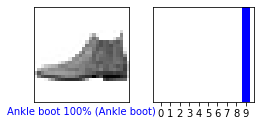

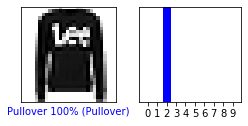

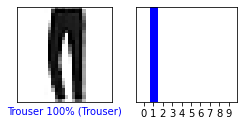

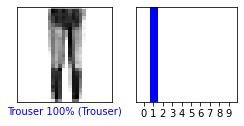

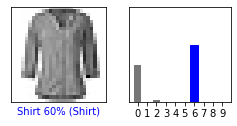

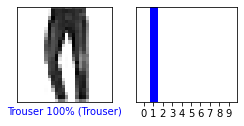

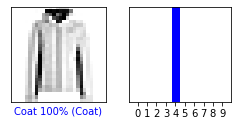

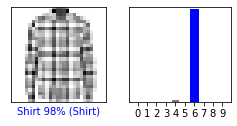

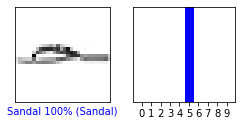

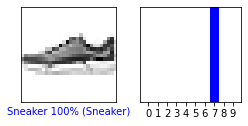

In [87]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

for i in range(10):
    plt.figure(figsize=(4,1.75))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_data)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i], test_labels)
    #print("Image", i+1, 
    #      " - actual class:", class_names[test_labels[i]],
    #      " - predicted class:", class_names[np.argmax(predictions[i])])

Podemos hacer predicciones sobre imagenes individuales. Sin embargo, debemos de tener en cuenta que los modelos de Keras están optimizados para trabajar sobre bloques o colecciones de ejemplos. Por ello, deberemos crear una lista a partir de nuestra imagen única:

[7.5393253e-10 1.4170598e-13 1.9693988e-12 1.4145484e-13 9.0511557e-11 7.2754187e-14 5.5807393e-13 2.1367777e-10 1.0000000e+00 3.5391498e-13]


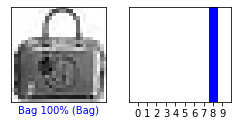

In [96]:
i = np.random.randint(0, test_data.shape[0]+1)
sample = test_data[i]
sample = (np.expand_dims(sample,0))
prediction = model.predict(sample)
print(prediction[0])
plt.figure(figsize=(4,1.75))
plt.subplot(1,2,1)
plot_image(i, prediction[0], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, prediction[0], test_labels)